In [2]:
import numpy as np

def bellman_equation(Q1, Q2, V, gamma, lambda_, mu1, mu2):

    p_stable = 1 #initialiser la proba de rester au meme état par 1
    v = 0 #initialiser la value function

    if Q1 < 20 and Q2 < 20: #possible incoming jobs with proba landa/2 to Q1 and Q2

      v += (0.5 * lambda_)*(-(Q1 + Q2 + 1) + gamma*V[Q1+1,Q2]) #dans v il ya le terme de r(s) et l'élement s' de la somme de p(s'|s)*V(s')
      v += (0.5 * lambda_)*(-(Q1 + Q2 + 1) + gamma*V[Q1,Q2+1])
      p_stable -= lambda_

    if Q1 > 0: #possile outcoming jobs from Q1
      p_stable -= mu1
      v += mu1*(-(Q1 + Q2 - 1) + gamma*V[Q1-1,Q2])

    if Q2 > 0: #possible outcoming jobs from Q2
      p_stable -= mu2
      v += mu2*(-(Q1 + Q2 - 1) + gamma*V[Q1,Q2-1])

    v += p_stable*(-(Q1 + Q2) + gamma*V[Q1,Q2]) #case if still on (Q1,Q2)

    return v

def iterative_policy_evaluation(gamma=0.99, lambda_=0.3, mu1=0.2, mu2=0.4, delta=1e-6):
    max_queue_size = 20
    num_queues = max_queue_size + 1

    # Initialize value function
    V = np.zeros((num_queues, num_queues))
    delta_max = 0
    while True:
        V_prev = np.copy(V)
        # Iterate over all states
        for Q1 in range(num_queues):
            for Q2 in range(num_queues):
                # Update value function using Bellman equation
                V[Q1, Q2] = bellman_equation(Q1, Q2, V_prev, gamma, lambda_, mu1, mu2)

        delta_max = np.linalg.norm(V - V_prev, ord='fro')
        if delta_max < delta:
            break  # Converged

    return V

# Example usage:
value_function1 = iterative_policy_evaluation()
#print(np.size(value_function1))
print(value_function1)


[[ -248.11658131  -250.94507676  -257.46629376  -267.53990074
   -281.03089833  -297.80941562  -317.75051205  -340.73398134
   -366.64414748  -395.36962631  -426.80298018  -460.8400671
   -497.37854066  -536.3140135   -577.52982591  -620.86937957
   -666.0611431   -712.5159286   -758.78246923  -801.10190893
   -829.64619677]
 [ -259.97607146  -262.8045669   -269.32578388  -279.39939081
   -292.8903883   -309.66890538  -329.61000138  -352.59346974
   -378.50363371  -407.22910696  -438.66244533  -472.69948672
   -509.2378219   -548.17286392  -589.38730942  -632.72244492
   -677.8996225   -724.3049731   -770.39821356  -812.08298983
   -838.1702167 ]
 [ -283.05962861  -285.88812403  -292.40934096  -302.48294775
   -315.97394495  -332.75246145  -352.69355634  -375.67702241
   -401.58718127  -430.31264197  -461.74594663  -495.78289157
   -532.32093932  -571.25510336  -612.46682235  -655.79338245
   -700.94327875  -747.26088701  -793.06914627  -833.8223984
   -856.87313348]
 [ -315.92905003  

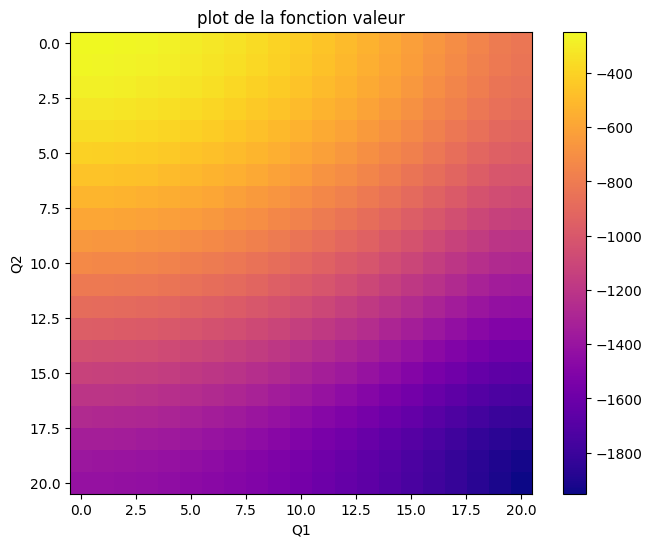

In [3]:
import matplotlib.pyplot as plt

# Supposons que 'values' est votre matrice 21x21


# Création de la heatmap
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(value_function1, cmap='plasma', interpolation='nearest')

# Ajout d'une barre d'échelle pour les valeurs
plt.colorbar(heatmap)

plt.xlabel('Q1')
plt.ylabel('Q2')

# Affichage
plt.title('plot de la fonction valeur')
plt.show()

In [3]:
import numpy as np

def solve_mdp(gamma=0.99, lambda_prob=0.3, mu1=0.2, mu2=0.4):
    # Define the bounds for Q1 and Q2
    max_jobs = 20

    # Create a list of all possible states
    states = [(i, j) for i in range(max_jobs + 1) for j in range(max_jobs + 1)]

    # Number of states
    num_states = len(states)
    # Initialize transition probability matrix P and reward matrix R
    P = np.zeros((num_states, num_states))
    R = np.zeros((num_states, 1))

    for idx, state in enumerate(states):
        Q1, Q2 = state
        R[idx] = 0
        P[idx, idx] = 1

        # Update transition probabilities for each action (dispatch to server 1 or 2)
        if Q1 < max_jobs and Q2 < max_jobs :
            next_idx_lambda1 = states.index((Q1 + 1, Q2))
            P[idx, next_idx_lambda1] = lambda_prob / 2 #update de proba sauf si Q1 < 20 et Q2 < 20
            next_idx_lambda2 = states.index((Q1, Q2 + 1))
            P[idx, next_idx_lambda2] = lambda_prob / 2 #update de proba sauf si Q1 < 20 et Q2 < 20
            P[idx, idx] -= lambda_prob #update de proba de rester à l'état s cas ou Q1 < 20 et Q2 < 20
            R[idx] -= lambda_prob * (Q1 + Q2 + 1) #update du reward sauf si Q1 < 20 et Q2 < 20

        if Q1 > 0:
            next_state_mu1 = (Q1 - 1, Q2)
            next_idx_mu1 = states.index(next_state_mu1)
            P[idx, next_idx_mu1] = mu1
            R[idx] -= mu1 * (Q1 + Q2 - 1)
            P[idx, idx] -= mu1

        if Q2 > 0:
            next_state_mu2 = (Q1, Q2 - 1)
            next_idx_mu2 = states.index(next_state_mu2)
            P[idx, next_idx_mu2] += mu2
            R[idx] -= mu2 * (Q1 + Q2 - 1)
            P[idx, idx] -= mu2

        R[idx] -= P[idx, idx]*(Q1+Q2) # ajoouter reward au cas rester au meme etat

    # Calculate the value function directly using the matrix formula (I - γP)^-1 * R
    #print(P)
    #print(R)
    I = np.identity(num_states)
    value_function = np.linalg.pinv(I - gamma * P) @ R
    value_function = value_function.reshape((max_jobs + 1, max_jobs + 1))
    return value_function

value_function2 = solve_mdp()
#print(value_function2[18,2])
# Calculate the difference between the matrices using the Frobenius norm
difference_norm = np.linalg.norm(value_function1 - value_function2)
print("Norme de la différence entre les deux matrices :", difference_norm)


Norme de la différence entre les deux matrices : 9.860453127739642e-05


In [4]:
def bellman_optimality_equation(Q1, Q2, V, gamma, lambda_, mu1, mu2):

    p_stable = 1 #initialiser la proba de rester au meme état par 1
    v1 = 0 #initialiser la value function avec politique a1
    v2 = 0 #initialiser la value function avec politique a2

    if Q1 < 20 and Q2 < 20: #possible incoming jobs with proba landa/2 to Q1 and Q2
      v1 += (lambda_)*(-(Q1 + Q2 + 1) + gamma*V[Q1+1,Q2])
      v2 += (lambda_)*(-(Q1 + Q2 + 1)  + gamma*V[Q1,Q2+1])
      p_stable -= lambda_

    if Q1 > 0: #possible outcoming jobs from Q1
      p_stable -= mu1
      v1 += mu1*(-(Q1 + Q2 - 1) + gamma*V[Q1-1,Q2])
      v2 += mu1*(-(Q1 + Q2 - 1) + gamma*V[Q1-1,Q2])

    if Q2 > 0: #possible outcoming jobs from Q2
      p_stable -= mu2
      v1 += mu2*(-(Q1 + Q2 - 1) + gamma*V[Q1,Q2-1])
      v2 += mu2*(-(Q1 + Q2 - 1) + gamma*V[Q1,Q2-1])

    v1 += p_stable*(-(Q1 + Q2) + gamma*V[Q1,Q2]) #case if still on (Q1,Q2)
    v2 += p_stable*(-(Q1 + Q2) + gamma*V[Q1,Q2]) #case if still on (Q1,Q2)

    if v1 > v2:
        return v1, 0  # La meilleure action est l'index 0 (dispatch to server 1)
    else:
        return v2, 1

In [5]:
def value_iteration(gamma=0.99, lambda_=0.3, mu1=0.2, mu2=0.4, delta=1e-8):
    max_queue_size = 20
    num_queues = max_queue_size + 1

    # Initialize value function
    V = np.zeros((num_queues, num_queues))
    policy = np.zeros((num_queues, num_queues), dtype=np.int)
    delta_max = 0
    while True:
        V_prev = np.copy(V)
        # Iterate over all states
        for Q1 in range(num_queues):
            for Q2 in range(num_queues):
                # Update value function using Bellman equation
                V[Q1, Q2], policy[Q1, Q2] = bellman_optimality_equation(Q1, Q2, V_prev, gamma, lambda_, mu1, mu2)

        delta_max = np.linalg.norm(V - V_prev, ord='fro') #norme frobeinus
        if delta_max < delta:
            break  # Converged

    return V, policy

value_function3,policy = value_iteration()
print(value_function3)
print(np.linalg.norm(value_function3 - value_function2))

<ipython-input-5-c59c3cd6e742>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  policy = np.zeros((num_queues, num_queues), dtype=np.int)


[[ -127.31350716  -130.59005622  -137.27858576  -147.25468643
   -160.3434506   -176.401352    -195.30010289  -216.92300243
   -241.16230886  -267.91762438  -297.09458727  -328.6039615
   -362.3607758   -398.28342681  -436.29235066  -476.30662298
   -518.23594951  -561.94460904  -607.10459032  -652.43345785
   -684.63953032]
 [ -132.27076259  -136.32545687  -144.42149335  -155.74991449
   -170.0625924   -187.25301017  -207.20887858  -229.82501672
   -255.00200057  -282.64584387  -312.66705589  -344.98023021
   -379.503221    -416.15616778  -454.85954713  -495.52789593
   -538.05538656  -582.24115875  -627.48977042  -671.20304075
   -698.2699191 ]
 [ -142.55339387  -147.1375519   -156.32104319  -169.30415379
   -185.52668821  -204.52090194  -226.17369428  -250.39350056
   -277.09077016  -306.17987703  -337.57755858  -371.2035317
   -406.97911566  -444.82597017  -484.66237069  -526.38903106
   -569.85905218  -614.69467463  -659.57601146  -698.44629912
   -722.25526231]
 [ -157.7031497   

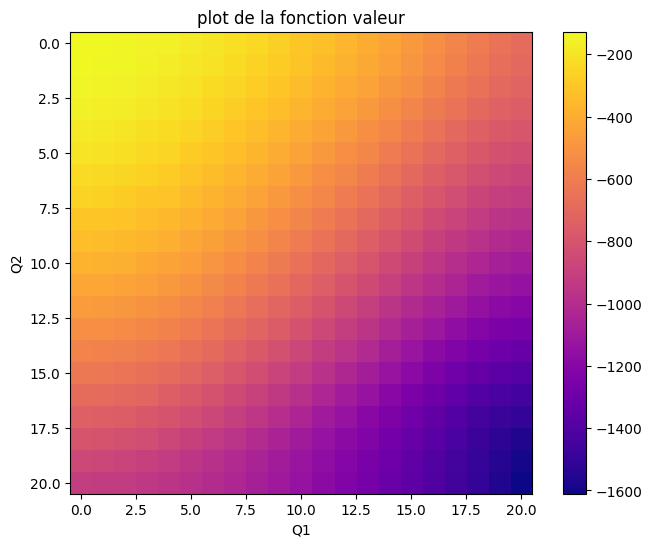

In [6]:
import matplotlib.pyplot as plt

# Supposons que 'values' est votre matrice 21x21


# Création de la heatmap
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(value_function3, cmap='plasma', interpolation='nearest')

# Ajout d'une barre d'échelle pour les valeurs
plt.colorbar(heatmap)

plt.xlabel('Q1')
plt.ylabel('Q2')

# Affichage
plt.title('plot de la fonction valeur')
plt.show()

In [12]:
import random


def probas_next_state(Q1,Q2,a,lambda_prob,mu1,mu2):
   p = np.zeros((5,1)) # p0 = PplusQ1 , p1 = PplusQ2 , p2 = PmoisQ1, p3=PmoinsQ2, p4 = Pq1q2
   p[4] = 1 #initialiser la proba de rester au meme état par 1
   # Update transition probabilities for each action (dispatch to server 1 or 2)
   if Q1 < 20 and Q2 < 20 :
    if a == 0 :
      p[0] = lambda_prob
    else :
      p[1] = lambda_prob

    p[4] -= lambda_prob

   if Q1 > 0:
    p[2] = mu1
    p[4] -= mu1

   if Q2 > 0:
    p[3] = mu2
    p[4] -= mu2

   return p



def solve_td0(gamma=0.99, lambda_prob=0.3, mu1=0.2, mu2=0.4,delta0=1e-4,V0 = value_function2,num_episodes = 500):
    # Define the bounds for Q1 and Q2
    max_jobs = 20
    V = np.zeros((21,21))
    #V = np.copy(V0)
    #V=V.reshape((441,1))
    # Create a list of all possible states
    states = [(i, j) for i in range(max_jobs + 1) for j in range(max_jobs + 1)]

    # Number of states
    num_states = len(states)
    for current_state in states:
        for episode in range(num_episodes):
            #print(episode)
            alpha_n=1/2
            V1=np.copy(V)
            Q1, Q2 = current_state
            action = np.random.choice([0,1],p=[0.5,0.5])

            #observer R_t+1 et S_t+1

            #calculer les probas pour estimer S_t+1

            vect_p = probas_next_state(Q1,Q2,action,lambda_prob,mu1,mu2)

            #Estimer S_t+1 et R_t+1 par simulation d'une variable uniforme

            random_number = random.uniform(0, 1)  # Nombre aléatoire entre 0 et 1
            if random_number < vect_p[0] :
                next_state = (Q1+1,Q2)  # État correspondant à la probabilité 1
            elif (random_number < vect_p[0] + vect_p[1]):
                next_state = (Q1,Q2+1)
            elif random_number < vect_p[0] + vect_p[1] + vect_p[2] :
                next_state = (Q1-1,Q2)
            elif random_number < vect_p[0] + vect_p[1] + vect_p[2] + vect_p[3] :
                next_state = (Q1,Q2-1)
            else:
                next_state = (Q1,Q2)

            R = -(next_state[0] + next_state[1]) #reward du next step

            #update du V(S)

            V[Q1,Q2]=V1[Q1,Q2]+alpha_n*(R + gamma * V1[next_state[0],next_state[1]] -V1[Q1,Q2])
            #print(next_state)
            current_state = next_state
            if (np.linalg.norm(V-V1) < delta0):
              print(np.linalg.norm(V-V1))
              break
            #if next_state[0] == 20 or next_state[1] == 20:
              #break


    #print( np.linalg.norm(V1-V))
    return V



value_function4 = solve_td0()
print(value_function4)
# Calculate the difference between the matrices using the Frobenius norm
#difference_norm = np.linalg.norm(value_function1 - value_function2)
print(np.linalg.norm(value_function4 - value_function2))

0.0
0.0
8.048706354202295e-05
3.867568455007131e-05
3.848230619496462e-05
8.209978909690108e-05
[[ -209.32126794  -213.94133774  -231.48388699  -248.61007622
   -259.35601792  -297.4328104   -300.9269815   -306.57521801
   -330.16726942  -338.48896403  -327.01484259  -298.8634254
   -294.71282378  -279.89521247  -233.11696994  -221.42789275
   -235.2605291   -252.8670065   -228.57570855  -227.60676651
   -219.76098385]
 [ -215.37858188  -208.65791509  -229.79698889  -252.93185559
   -255.35705555  -288.01678659  -314.65340379  -326.38270794
   -338.43934652  -340.93347729  -335.04449469  -320.97207292
   -290.25555295  -281.14291602  -270.99507213  -192.11816574
   -218.97550046  -206.23027492  -215.49935513  -209.94058369
   -132.18974498]
 [ -223.93708632  -262.54974948  -244.67785093  -259.93119485
   -276.56681435  -321.78610053  -330.72183332  -343.98680196
   -339.9252277   -351.86887963  -343.15224714  -309.73921577
   -269.05669649  -261.34040554  -268.58488873  -281.31149176
 

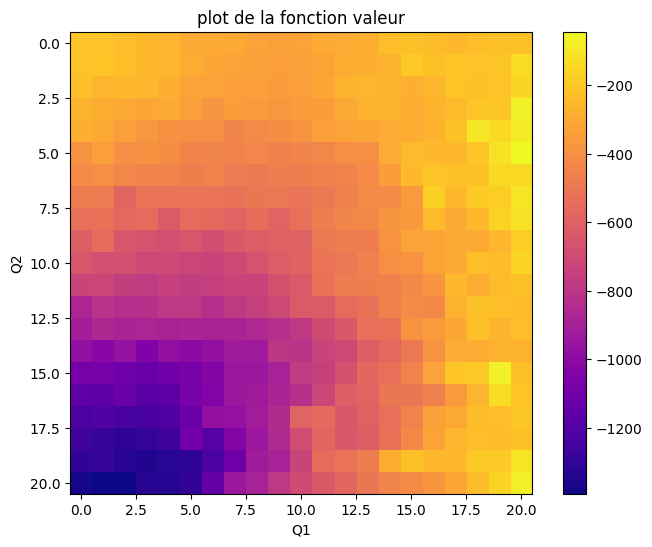

In [13]:
import matplotlib.pyplot as plt

# Supposons que 'values' est votre matrice 21x21


# Création de la heatmap
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(value_function4, cmap='plasma', interpolation='nearest')

# Ajout d'une barre d'échelle pour les valeurs
plt.colorbar(heatmap)

plt.xlabel('Q1')
plt.ylabel('Q2')

# Affichage
plt.title('plot de la fonction valeur')
plt.show()

In [14]:
import numpy as np

def q_learning(gamma=0.99, lambda_prob=0.3, mu1=0.2, mu2=0.4, alpha0 = 1, num_episodes=10):
    # Define the bounds for Q1 and Q2
    max_jobs = 20

    # Create a list of all possible states
    states = [(i, j) for i in range(max_jobs + 1) for j in range(max_jobs + 1)]

    # Number of states
    num_states = len(states)

    # Initialize Q-function
    Q = np.zeros((max_jobs + 1, max_jobs + 1, 2))  # Q[state[0], state[1], action]
    i=1

    for current_state in states:
        i=1
        for episode in range(num_episodes):
            print(episode)
            alpha = 1/i
            # Initialize the state
            Q1, Q2 = current_state

            # Choose an action (dispatch to server 1 or 2) with epsilon-greedy policy
            epsilon = 0.1
            if np.random.rand() < epsilon:
                 action = np.random.choice([0, 1])
            else:
                 action = np.argmax(Q[current_state[0], current_state[1],:])


            #calculer les probas pour estimer S_t+1

            vect_p = probas_next_state(Q1,Q2,action,lambda_prob,mu1,mu2) #vecteur de proba de P(S'|S,A)

            #Estimer S_t+1 et R_t+1 par simulation d'une variable uniforme

            random_number = random.uniform(0, 1)  # Nombre aléatoire entre 0 et 1
            if random_number < vect_p[0] :
                next_state = (Q1+1,Q2)  # État correspondant à la probabilité 1
            elif (random_number < vect_p[0] + vect_p[1]):
                 next_state = (Q1,Q2+1)
            elif random_number < vect_p[0] + vect_p[1] + vect_p[2] :
                next_state = (Q1-1,Q2)
            elif random_number < vect_p[0] + vect_p[1] + vect_p[2] + vect_p[3] :
                next_state = (Q1,Q2-1)
            else:
                next_state = (Q1,Q2)

            R = -(next_state[0] + next_state[1]) #reward du next step
            q = max(Q[next_state[0],next_state[1],:])
            Q[Q1, Q2, action] += alpha * (R + gamma*q - Q[Q1, Q2, action])

            # Move to the next state
            current_state = next_state
            Q1,Q2 = current_state
            i=i+1
    # Extract the optimal policy from the learned Q-function
    optimal_policy = np.argmax(Q, axis=2)

    return optimal_policy

# Run Q-learning and get the optimal policy
optimal_policy_q_learning = q_learning()

# Display the optimal policy
print("Optimal Policy (1: Dispatch to server 2, 0: Dispatch to server1 ):")
print(optimal_policy_q_learning)


0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


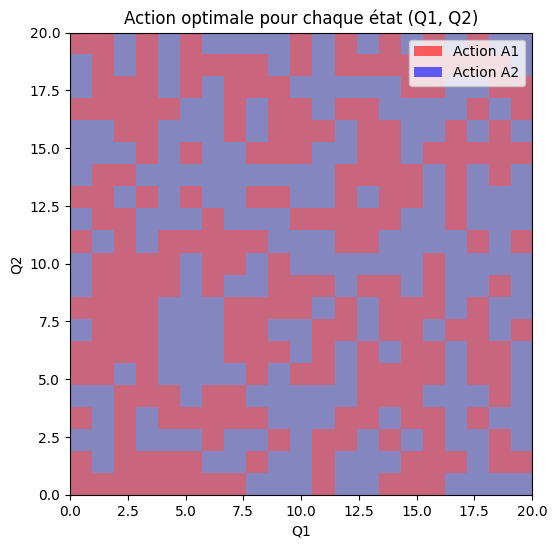

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(optimal_policy_q_learning, cmap='RdYlBu', extent=(0, 20, 0, 20), origin='lower', alpha=0.6)

# Configuration de l'axe des x et y
plt.xlabel('Q1')
plt.ylabel('Q2')

# Légende pour les couleurs (0 - Rouge, 1 - Bleu)
red_patch = plt.Rectangle((0, 0), 1, 1, fc="r", alpha=0.6, edgecolor='none')
blue_patch = plt.Rectangle((0, 0), 1, 1, fc="b", alpha=0.6, edgecolor='none')
plt.legend([red_patch, blue_patch], ['Action A1', 'Action A2'], loc='upper right')

# Affichage
plt.title('Action optimale pour chaque état (Q1, Q2)')
plt.grid(False)
plt.show()

In [17]:
print(np.shape(optimal_policy_q_learning))

(21, 21)


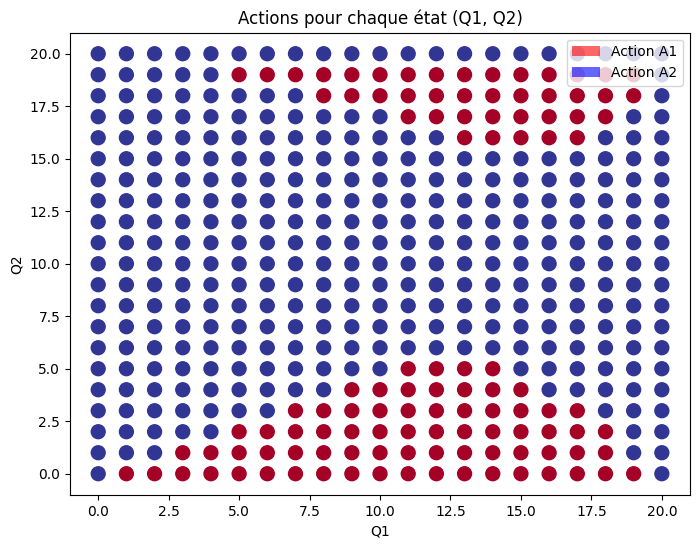

In [ ]:
import matplotlib.pyplot as plt

Q1 = np.arange(0, 21)
Q2 = np.arange(0, 21)
Q1, Q2 = np.meshgrid(Q1, Q2)

# Création de la figure
plt.figure(figsize=(8, 6))

# Affichage des tâches colorées pour chaque état
plt.scatter(Q1, Q2, c=policy, cmap='RdYlBu', s=100)

# Configuration de l'axe des x et y
plt.xlabel('Q1')
plt.ylabel('Q2')

# Légende pour les couleurs (0 - Rouge, 1 - Bleu)
red_patch = plt.Rectangle((0, 0), 1, 1, fc="r", alpha=0.6, edgecolor='none')
blue_patch = plt.Rectangle((0, 0), 1, 1, fc="b", alpha=0.6, edgecolor='none')
plt.legend([red_patch, blue_patch], ['Action A1', 'Action A2'], loc='upper right')

# Affichage
plt.title('Actions pour chaque état (Q1, Q2)')
plt.grid(False)
plt.show()